In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
from itertools import combinations
from sklearn.base import clone
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler ,OneHotEncoder, StandardScaler

plt.style.use({'figure.facecolor': 'white'})

## 4.1

In [8]:
csv_data = '''A, B, C, D
              1.0, 2.0, 3.0, 4.0
              5.0, 6.0,, 8.0
              10.0, 11.0, 12.0,'''
df = pd.read_csv(StringIO(csv_data))
print(df)
print(df.isnull().sum())
print(df.dropna())
print(df.dropna(axis=1))

imr = SimpleImputer(missing_values=np.nan, strategy="mean")
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
print(imputed_data)

print(df.fillna(df.mean()))

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
A     0
 B    0
 C    1
 D    1
dtype: int64
     A    B    C    D
0  1.0  2.0  3.0  4.0
      A     B
0   1.0   2.0
1   5.0   6.0
2  10.0  11.0
[[ 1.   2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.  11.  12.   6. ]]
      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   7.5  8.0
2  10.0  11.0  12.0  6.0


## 4.2

In [41]:
df = pd.DataFrame([
    ["green", "M", 10.1, "class2"],
    ["red", "L", 13.5, "class1"],
    ["blue", "XL", 15.3, "class2"]
])
df.columns = ["color", "size", "price", "classlabel"]
print(df)

   color size  price classlabel
0  green    M   10.1     class2
1    red    L   13.5     class1
2   blue   XL   15.3     class2


In [42]:
size_mapping = {"XL": 3, "L": 2, "M": 1}
df["size"] = df["size"].map(size_mapping)
print(df)
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df["size"].map(inv_size_mapping)
print(df)

   color  size  price classlabel
0  green     1   10.1     class2
1    red     2   13.5     class1
2   blue     3   15.3     class2
   color  size  price classlabel
0  green     1   10.1     class2
1    red     2   13.5     class1
2   blue     3   15.3     class2


In [44]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df["classlabel"]))}
print(class_mapping)
df["classlabel"] = df["classlabel"].map(class_mapping)
print(df)

inv_class_mappping = {v: k for k, v in class_mapping.items()}
df["classlabel"] = df["classlabel"].map(inv_class_mappping)
print(df)

class_le = LabelEncoder()
y = class_le.fit_transform(df["classlabel"].values)
print(y)
print(class_le.inverse_transform(y))

{'class1': 0, 'class2': 1}
   color  size  price  classlabel
0  green     1   10.1           1
1    red     2   13.5           0
2   blue     3   15.3           1
   color  size  price classlabel
0  green     1   10.1     class2
1    red     2   13.5     class1
2   blue     3   15.3     class2
[1 0 1]
['class2' 'class1' 'class2']


In [52]:
X = df[["color", "size", "price"]].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
print(X)

X = df[["color", "size", "price"]].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

# X = df[["color", "size", "price"]].values
c_transf = ColumnTransformer([("onhot", OneHotEncoder(), [0]), ("nothing", "passthrough", [1, 2])])
print(c_transf.fit_transform(X).astype(float))

print(pd.get_dummies(df[["price", "color", "size"]]))

print(pd.get_dummies(df[["price", "color", "size"]], drop_first=True))

[[1 1 10.1]
 [2 2 13.5]
 [0 3 15.3]]
[[ 0.   1.   0.   1.  10.1]
 [ 0.   0.   1.   2.  13.5]
 [ 1.   0.   0.   3.  15.3]]
   price  size  color_blue  color_green  color_red
0   10.1     1           0            1          0
1   13.5     2           0            0          1
2   15.3     3           1            0          0
   price  size  color_green  color_red
0   10.1     1            1          0
1   13.5     2            0          1
2   15.3     3            0          0


## 4.3

In [62]:
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
df_wine.columns = ["Class label", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phnols", "Flavanoids", "Nonflavanoid phnols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
print("Class labels", np.unique(df_wine["Class label"]))
print(df_wine.head())

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

Class labels [1 2 3]
   Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phnols  Flavanoids  Nonflavanoid phnols  Proanthocyanins  \
0          2.80        3.06                 0.28             2.29   
1          2.65        2.76                 0.26             1.28   
2          2.80        3.24                 0.30             2.81   
3          3.85        3.49                 0.24             2.18   
4          2.80        2.69                 0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                       

## 4.4

In [66]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## 4.5

Training accuracy:  1.0
Test accuracy:  1.0
[-1.26350156 -1.21584591 -2.36879309]


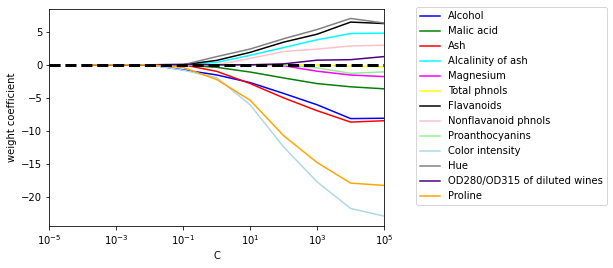

In [75]:
lr = LogisticRegression(penalty="l1", C=1.0, solver="liblinear", multi_class="ovr")
lr.fit(X_train_std, y_train)
print("Training accuracy: ", lr.score(X_train_std, y_train))
print("Test accuracy: ", lr.score(X_test_std, y_test))
print(lr.intercept_)

fig = plt.figure()
ax = plt.subplot(111)
colors = ["blue", "green", "red", "cyan", "magenta", "yellow", "black", "pink", "lightgreen", "lightblue", "gray", "indigo", "orange"]
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty="l1", C=10.**c, solver="liblinear", multi_class="ovr", random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column + 1], color=color)

plt.axhline(0, color="black", linestyle="--", linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel("weight coefficient")
plt.xlabel("C")
plt.xscale("log")
plt.legend(loc="upper left")
ax.legend(loc="upper center", bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

In [79]:
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r = dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])

        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

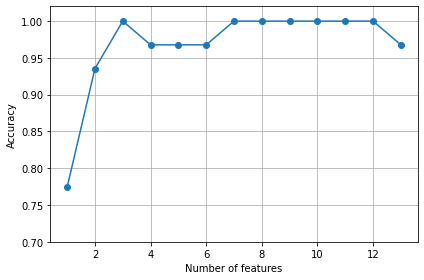

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')
Training accuracy:  0.967741935483871
Test accuracy:  0.9629629629629629
Training accuracy:  0.9516129032258065
Test accuracy:  0.9259259259259259


In [83]:
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker="o")
plt.ylim([0.7, 1.02])
plt.ylabel("Accuracy")
plt.xlabel("Number of features")
plt.grid()
plt.tight_layout()
plt.show()

k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

knn.fit(X_train_std, y_train)
print("Training accuracy: ", knn.score(X_train_std, y_train))
print("Test accuracy: ", knn.score(X_test_std, y_test))

knn.fit(X_train_std[:, k3], y_train)
print("Training accuracy: ", knn.score(X_train_std[:, k3], y_train))
print("Test accuracy: ", knn.score(X_test_std[:, k3], y_test))

## 4.6


 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phnols                   0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phnols            0.013354
13) Ash                            0.013279


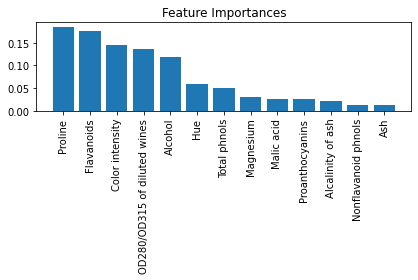

Number of features that meet this threshold criterion:  5
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529


In [89]:
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print("Number of features that meet this threshold criterion: ", X_selected.shape[1])
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
